#Question 1


##A


In [ ]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
# Load the dataset
file_path = "/content/gdrive/MyDrive/mentalhealth.csv"
mentalhealth_df = pd.read_csv(file_path)

# Display basic information and first few rows
mentalhealth_df.info(), mentalhealth_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53047 entries, 0 to 53046
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53044 non-null  object
 1   statement   52681 non-null  object
 2   status      53016 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


(None,
   Unnamed: 0                                          statement   status
 0          0                                         oh my gosh  Anxiety
 1          1  trouble sleeping, confused mind, restless hear...  Anxiety
 2          2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
 3          3  I've shifted my focus to something else but I'...  Anxiety
 4          4  I'm restless and restless, it's been a month n...  Anxiety)

In [ ]:
print ("Find missing value of each column")
print (mentalhealth_df.isna().sum())

Find missing value of each column
Unnamed: 0      3
statement     366
status         31
dtype: int64


In [ ]:
total_missing = mentalhealth_df.isnull().sum().sum()
print (f"\nTotal Missing Values in Dataset: {total_missing}")


Total Missing Values in Dataset: 400


In [ ]:
# Impute missing values in 'statement' and 'status'
mentalhealth_df['Unnamed: 0'].fillna('Unknown', inplace=True)
mentalhealth_df['statement'].fillna("No statement provided", inplace=True)
mentalhealth_df['status'].fillna(mentalhealth_df['status'].mode()[0], inplace=True)

<ipython-input-5-b214941f3500>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mentalhealth_df['Unnamed: 0'].fillna('Unknown', inplace=True)
<ipython-input-5-b214941f3500>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
# Verify no missing values remain
missing_values_after = mentalhealth_df.isna().sum()
print("Missing Values After Cleaning:\n", missing_values_after)

Missing Values After Cleaning:
 Unnamed: 0    0
statement     0
status        0
dtype: int64


## B

In [ ]:
# Count categories in 'status'
status_counts = mentalhealth_df['status'].value_counts().sort_values()

# Display counts
status_counts

,count
status,
Personality disorder,1199
Stress,2669
Bipolar,2873
Anxiety,3881
Suicidal,10647
Depression,15399
Normal,16379


In [ ]:
# Convert status to binary classification
mentalhealth_df['status'] = mentalhealth_df['status'].apply(lambda x: 'Normal' if x == 'Normal' else 'Depression')

# Verify the transformation
mentalhealth_df['status'].value_counts()

,count
status,
Depression,36668
Normal,16379


#Question 2

##A

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'status' column (Normal = 0, Depression = 1)
label_encoder = LabelEncoder()
mentalhealth_df['status'] = label_encoder.fit_transform(mentalhealth_df['status'])

##B

In [ ]:
from sklearn.model_selection import train_test_split
# Put status as dependent(y) and statement as independent(X) variables

mentalhealth_df = mentalhealth_df.sample(frac=1, random_state=42).reset_index(drop=True)

X = mentalhealth_df['statement']
y = mentalhealth_df['status']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Count both training and testing set size
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 42437
Testing set size: 10610


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text statements into TF-IDF numerical features
vectorizer = TfidfVectorizer(max_features=10000)  # Limit features to 5000 for efficiency
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_dt_train = dt_model.predict(X_train_tfidf)
y_pred_dt = dt_model.predict(X_test_tfidf)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network Classifier
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_model.fit(X_train_tfidf, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [ ]:
# Predictions
y_pred_nn = nn_model.predict(X_test_tfidf)
y_pred_nn_train = dt_model.predict(X_train_tfidf)

#Question 3

##A

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# Decision Tree Model Performance
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
accuracy_dt_test = accuracy_score(y_test, y_pred_nn)

precision_dt_train = precision_score(y_train, y_pred_dt_train,)
precision_dt_test = precision_score(y_test, y_pred_nn)

recall_dt_train = recall_score(y_train, y_pred_dt_train,)
recall_dt_test = recall_score(y_test, y_pred_nn)

report_dt_train = classification_report(y_train, y_pred_dt_train)
report_dt_test = classification_report(y_test, y_pred_nn)

# Neural Network Model Performance
accuracy_nn_train = accuracy_score(y_train, y_pred_nn_train)
accuracy_nn_test = accuracy_score(y_test, y_pred_nn)

precision_nn_train = precision_score(y_train, y_pred_nn_train)
precision_nn_test = precision_score(y_test, y_pred_nn)

recall_nn_train = recall_score(y_train, y_pred_nn_train)
recall_nn_test = recall_score(y_test, y_pred_nn)

report_nn_train = classification_report(y_train, y_pred_nn_train)
report_nn_test = classification_report(y_test, y_pred_nn)

# Print Decision Tree Results
print(f"Decision Tree Accuracy (Train): {accuracy_dt_train:.4f}")
print(f"Decision Tree Accuracy (Test): {accuracy_dt_test:.4f}")
print(f"Decision Tree Precision (Train): {precision_dt_train:.4f}")
print(f"Decision Tree Precision (Test): {precision_dt_test:.4f}")
print(f"Decision Tree Recall (Train): {recall_dt_train:.4f}")
print(f"Decision Tree Recall (Test): {recall_dt_test:.4f}")
print("Decision Tree Classification Report (Train):\n", report_dt_train)
print("Decision Tree Classification Report (Test):\n", report_dt_test)

# Print Neural Network Results
print(f"------------------------------------------------------")
print(f"Neural Network Accuracy (Train): {accuracy_nn_train:.4f}")
print(f"Neural Network Accuracy (Test): {accuracy_nn_test:.4f}")
print(f"Neural Network Precision (Train): {precision_nn_train:.4f}")
print(f"Neural Network Precision (Test): {precision_nn_test:.4f}")
print(f"Neural Network Recall (Train): {recall_nn_train:.4f}")
print(f"Neural Network Recall (Test): {recall_nn_test:.4f}")
print("Neural Network Classification Report (Train):\n", report_nn_train)
print("Neural Network Classification Report (Test):\n", report_nn_test)

Decision Tree Accuracy (Train): 0.9994
Decision Tree Accuracy (Test): 0.9372
Decision Tree Precision (Train): 0.9992
Decision Tree Precision (Test): 0.8961
Decision Tree Recall (Train): 0.9989
Decision Tree Recall (Test): 0.9010
Decision Tree Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29332
           1       1.00      1.00      1.00     13105

    accuracy                           1.00     42437
   macro avg       1.00      1.00      1.00     42437
weighted avg       1.00      1.00      1.00     42437

Decision Tree Classification Report (Test):
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      7336
           1       0.90      0.90      0.90      3274

    accuracy                           0.94     10610
   macro avg       0.93      0.93      0.93     10610
weighted avg       0.94      0.94      0.94     10610

--------------------------

##B

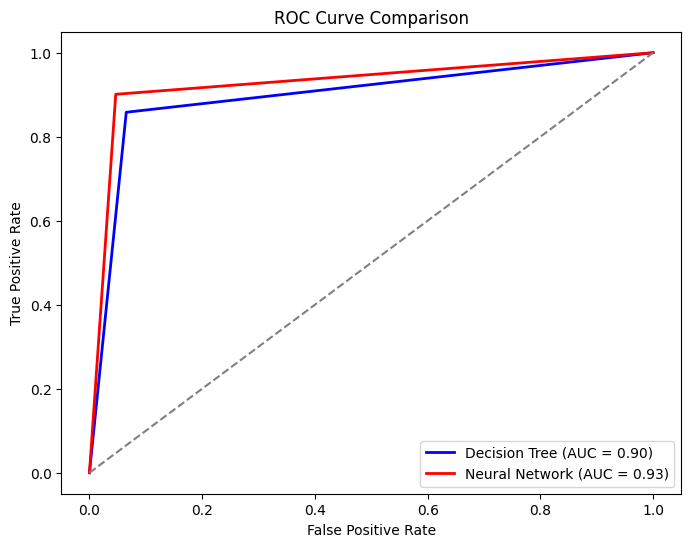

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC curve for DT model
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# ROC Curve for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC Curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

#Question 4

##A

In [ ]:
# Classify new test statements
test_statements = [
    "I can't stop worrying about everything",
    "I've been working hard, and seeing the results makes me feel incredibly happy and fulfilled",
    "Even the smallest things feel like too much right now",
    "I can’t stop smiling",
    "Today has been amazing!"
]

test_statements_tfidf = vectorizer.transform(test_statements)

# Predictions for new test statements
dt_predictions = dt_model.predict(test_statements_tfidf)
nn_predictions = nn_model.predict(test_statements_tfidf)

# Convert numerical predictions back to labels
dt_predictions_labels = label_encoder.inverse_transform(dt_predictions)
nn_predictions_labels = label_encoder.inverse_transform(nn_predictions)

# Display results
for i, statement in enumerate(test_statements):
    print(f"Statement: {statement}")
    print(f"Decision Tree Prediction: {dt_predictions_labels[i]}")
    print(f"Neural Network Prediction: {nn_predictions_labels[i]}")
    print(" ")

Statement: I can't stop worrying about everything
Decision Tree Prediction: Depression
Neural Network Prediction: Depression
 
Statement: I've been working hard, and seeing the results makes me feel incredibly happy and fulfilled
Decision Tree Prediction: Normal
Neural Network Prediction: Normal
 
Statement: Even the smallest things feel like too much right now
Decision Tree Prediction: Depression
Neural Network Prediction: Depression
 
Statement: I can’t stop smiling
Decision Tree Prediction: Normal
Neural Network Prediction: Normal
 
Statement: Today has been amazing!
Decision Tree Prediction: Normal
Neural Network Prediction: Normal
 
